<a href="https://colab.research.google.com/github/parvekarsakshi09/ML-practicals/blob/main/Decision_Tree_classifier_algorithm_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Sakshi Parvekar")
print("2021BIT024")

Sakshi Parvekar
2021BIT024


### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
%matplotlib inline

### Import the datase

In [ ]:
df=pd.read_csv(r"C:\dataset\Diabetes - Diabetes.csv")

### EDA

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Splitting data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape, x_test.shape

((614, 8), (154, 8))

### Fit the model

### Decision tree using gini index

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7597


In [ ]:
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [ ]:
print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.7638
Test set score: 0.7597


In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
import graphviz

[Text(0.5, 0.875, 'x[1] <= 137.5\ngini = 0.424\nsamples = 154\nvalue = [107, 47]'),
 Text(0.25, 0.625, 'x[0] <= 3.5\ngini = 0.287\nsamples = 115\nvalue = [95, 20]'),
 Text(0.125, 0.375, 'x[2] <= 94.0\ngini = 0.134\nsamples = 69\nvalue = [64, 5]'),
 Text(0.0625, 0.125, 'gini = 0.111\nsamples = 68\nvalue = [64, 4]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.375, 'x[6] <= 0.765\ngini = 0.44\nsamples = 46\nvalue = [31, 15]'),
 Text(0.3125, 0.125, 'gini = 0.369\nsamples = 41\nvalue = [31, 10]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.75, 0.625, 'x[4] <= 30.5\ngini = 0.426\nsamples = 39\nvalue = [12, 27]'),
 Text(0.625, 0.375, 'x[2] <= 87.0\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.6875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.875, 0.375, 'x[4] <= 148.0\ngini = 0.496\nsamples = 22\nvalue = [10, 12]'),
 Text(0.8125, 0.12

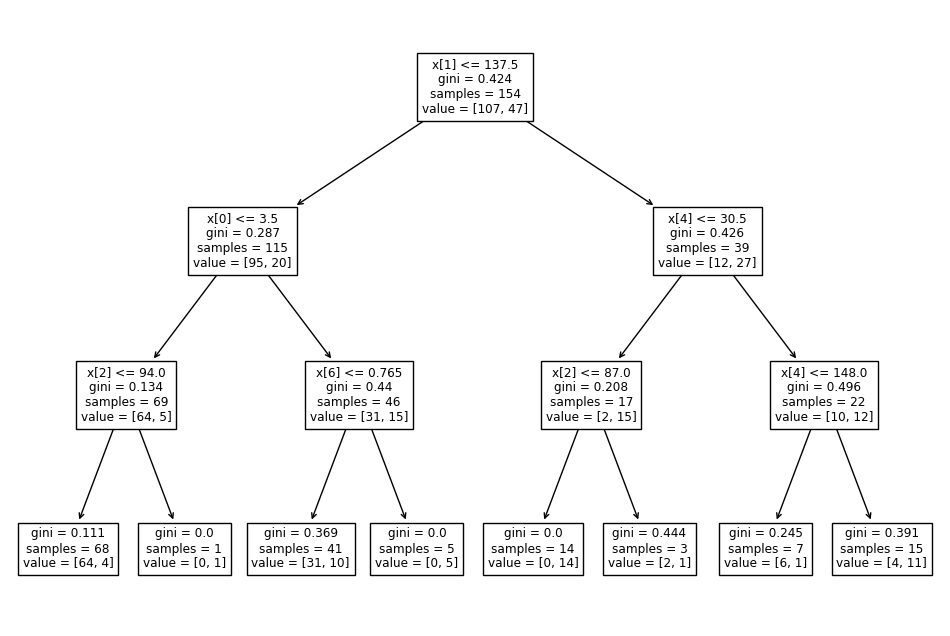

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_test, y_test))

### Kfold

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [ ]:
kfold = KFold(n_splits=4)
cv_results= cross_val_score(clf_gini, x , y , cv=kfold)
print(cv_results)

[0.71875    0.66666667 0.75520833 0.73958333]


In [ ]:
print(cv_results.mean())

0.7200520833333334


### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
}
grid = GridSearchCV(clf_gini, param_grid, cv=10)
grid.fit(x, y)
grid

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'criterion': 'entropy', 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7382604237867396
{'criterion': 'entropy', 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


### Calculating Accurancy,Precision,Recall,F1score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, y_pred_gini)
precision = precision_score(y_test, y_pred_gini)
recall = recall_score(y_test, y_pred_gini)
f1 = f1_score(y_test, y_pred_gini)

In [ ]:
print(f"Accuracy: {accuracy:}")
print(f"Precision: {precision:}")
print(f"Recall: {recall:}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.7597402597402597
Precision: 0.631578947368421
Recall: 0.5106382978723404
F1 Score: 0.56


### Confusion Matrix

In [ ]:
confn_matrix = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix")
print(confn_matrix)

Confusion Matrix
[[93 14]
 [23 24]]


### Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classi=classification_report(y_test,y_pred_gini)
print(f'clas{classi}')

clas              precision    recall  f1-score   support

           0       0.80      0.87      0.83       107
           1       0.63      0.51      0.56        47

    accuracy                           0.76       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.75      0.76      0.75       154



### plot Confusion matrix

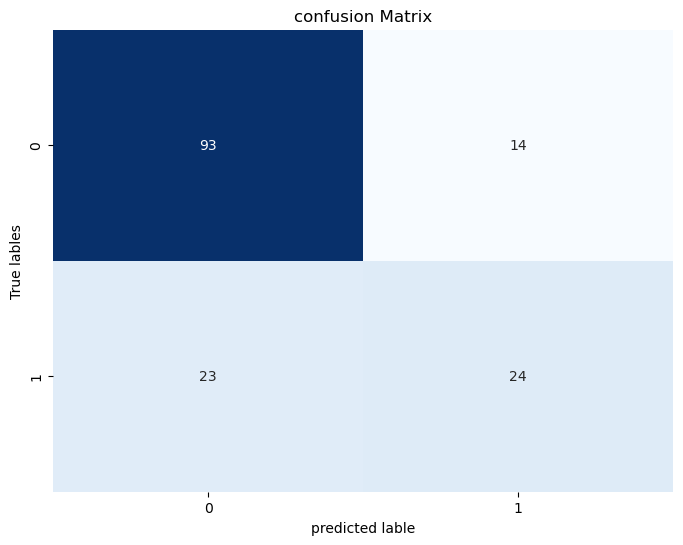

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cmt=confusion_matrix(y_test,y_pred_gini)
plt.figure(figsize=(8,6))
sns.heatmap(cmt,annot=True,cmap='Blues',fmt='g',cbar=False)
plt.xlabel('predicted lable')
plt.ylabel('True lables')
plt.title('confusion Matrix')
plt.show()

### decision Tree classifier with entropy

In [ ]:
dt_classifier_entropy = DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt_classifier_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_entropy = dt_classifier_entropy.predict(x_test)

### Calculating accuracy,precision,recall,f1 score

In [ ]:
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy)
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_entropy = f1_score(y_test, y_pred_entropy)
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)


In [ ]:
print("Evaluation Metrics with Criterion 'entropy':")
print("Accuracy:", accuracy_entropy)
print("Precision:", precision_entropy)
print("Recall:", recall_entropy)
print("F1-score:", f1_entropy)
print("Confusion Matrix:\n", conf_matrix_entropy)

Evaluation Metrics with Criterion 'entropy':
Accuracy: 0.7402597402597403
Precision: 0.5614035087719298
Recall: 0.6808510638297872
F1-score: 0.6153846153846153
Confusion Matrix:
 [[82 25]
 [15 32]]


In [ ]:
features=x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

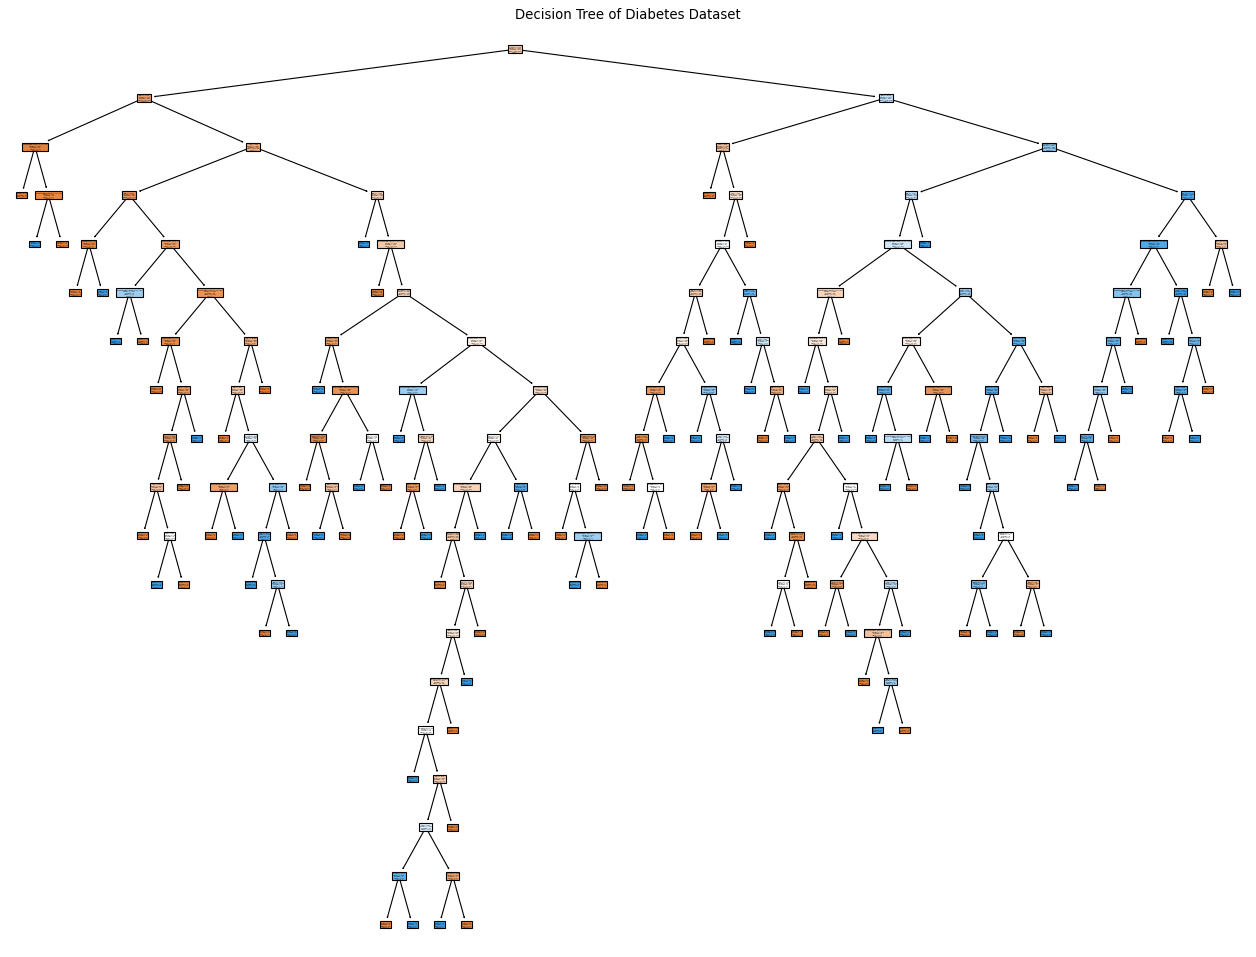

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15),dpi= 80)
class_labels = ['Negative', 'Positive']
plot_tree(dt_classifier_entropy, filled=True, feature_names=list(features), class_names=['0', '1'])
plt.title("Decision Tree of Diabetes Dataset")
plt.show()

### Confusion matrix

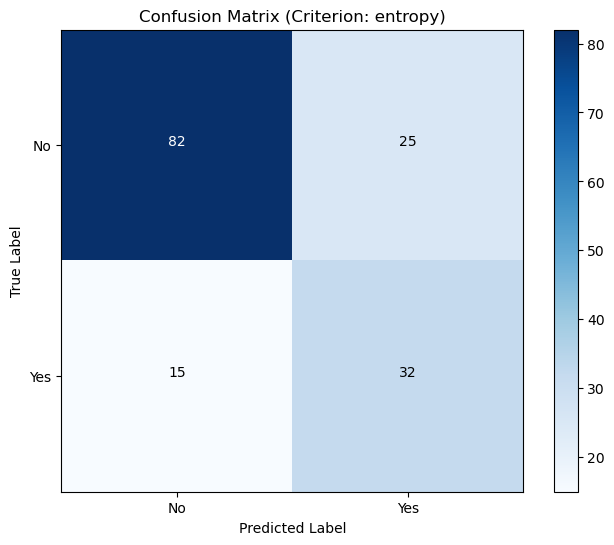

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_entropy, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Criterion: entropy)')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['No', 'Yes'])
plt.yticks(tick_marks, ['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(conf_matrix_entropy)):
    for j in range(len(conf_matrix_entropy[i])):
        plt.text(j, i, format(conf_matrix_entropy[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix_entropy[i, j] > conf_matrix_entropy.max() / 2 else "black")

plt.show()

### Kfold

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [ ]:
kfold = KFold(n_splits=4)
cv_results= cross_val_score(dt_classifier_entropy , x , y , cv=kfold)
print(cv_results)

[0.72395833 0.68229167 0.70833333 0.765625  ]


In [ ]:
print(cv_results.mean())

0.7200520833333334


### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
}
grid = GridSearchCV(dt_classifier_entropy, param_grid, cv=10)
grid.fit(x, y)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'criterion': 'gini', 'splitter': 'best'}
DecisionTreeClassifier()


In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7147983595352017
{'criterion': 'gini', 'splitter': 'best'}
DecisionTreeClassifier()
